In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import math
import warnings
import seaborn as sns
import plotly.offline as py
from scipy import signal
import folium
from folium.plugins import MarkerCluster
import plotly.graph_objs as go
import matplotlib.pyplot as plt


In [30]:
hypertension_dataset = pd.read_csv('C:/Users/Vedantika/Desktop/DPSs/DPS/hypertension_data.csv') 

In [31]:
hypertension_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
hypertension_dataset.shape

(4999, 14)

In [33]:
hypertension_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,4999.000000,4992.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,57.306861,0.329928,0.963593,131.587317,246.798360,0.150430,0.524305,149.442488,0.328066,1.048730,1.395879,0.723745,2.320264,0.545909
std,10.561727,0.470234,1.024448,17.663701,52.393478,0.357528,0.524852,22.814514,0.469556,1.169128,0.617789,1.012476,0.606794,0.497938
min,22.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,58.000000,0.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,65.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,88.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
hypertension_dataset=hypertension_dataset.drop_duplicates()
hypertension_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4998
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       4999 non-null   int64  
 1   sex       4992 non-null   float64
 2   cp        4999 non-null   int64  
 3   trestbps  4999 non-null   int64  
 4   chol      4999 non-null   int64  
 5   fbs       4999 non-null   int64  
 6   restecg   4999 non-null   int64  
 7   thalach   4999 non-null   int64  
 8   exang     4999 non-null   int64  
 9   oldpeak   4999 non-null   float64
 10  slope     4999 non-null   int64  
 11  ca        4999 non-null   int64  
 12  thal      4999 non-null   int64  
 13  target    4999 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 585.8 KB


In [35]:
hypertension_dataset['target'].value_counts()

1    2729
0    2270
Name: target, dtype: int64

0 --> Non-hypertensive

1 --> Hypertensive

In [36]:
X = hypertension_dataset.drop(columns = 'target', axis=1)
Y = hypertension_dataset['target']

In [37]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      57  1.0   3       145   233    1        0      150      0      2.3   
1      64  0.0   2       130   250    0        1      187      0      3.5   
2      52  1.0   1       130   204    0        0      172      0      1.4   
3      56  0.0   1       120   236    0        1      178      0      0.8   
4      66  0.0   0       120   354    0        1      163      1      0.6   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
4994   42  0.0   0       128   259    0        0      130      1      3.0   
4995   52  1.0   0       150   244    0        1      154      1      1.4   
4996   43  0.0   3       120   231    0        1      182      1      3.8   
4997   54  1.0   0       178   228    1        1      165      1      1.0   
4998   66  0.0   0       123   282    0        1       95      1      2.0   

      slope  ca  thal  
0         0   0     1  
1         0   0     2  
2  

In [38]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4994    0
4995    0
4996    0
4997    0
4998    0
Name: target, Length: 4999, dtype: int64


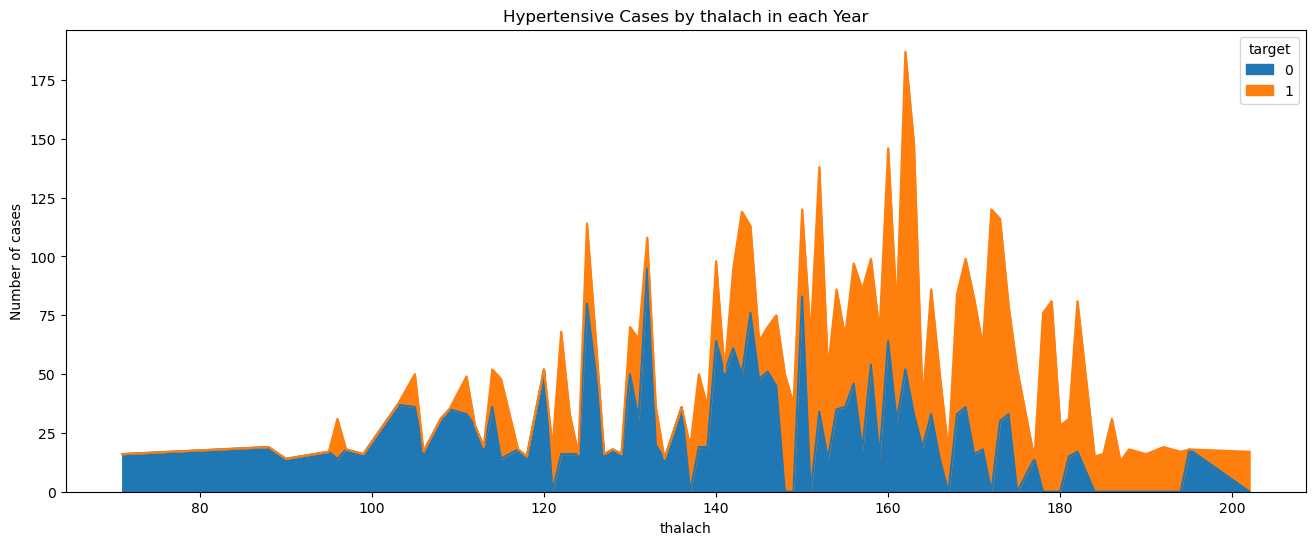

In [39]:
pd.crosstab(hypertension_dataset.thalach, hypertension_dataset.target).plot(kind='area',figsize=(16,6))
plt.title('Hypertensive Cases by thalach in each Year')
plt.ylabel('Number of cases')
plt.show()

In [40]:
age = hypertension_dataset.loc[:,'age']
print('Number of people affected by age:', int(sum(age.dropna())))

target = hypertension_dataset.loc[:,'target']
targetageData = pd.concat([target, age], axis=1)
targetageData.head()

Number of people affected by age: 286477


,target,age
0,1,57
1,1,64
2,1,52
3,1,56
4,1,66


In [41]:
targetageFormatData = targetageData.pivot_table(columns='target', values='age', aggfunc='sum')
targetageFormatData

target,0,1
age,130741,155736


In [42]:
targetageFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, age to age
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       1 non-null      int64
 1   1       1 non-null      int64
dtypes: int64(2)
memory usage: 132.0+ bytes


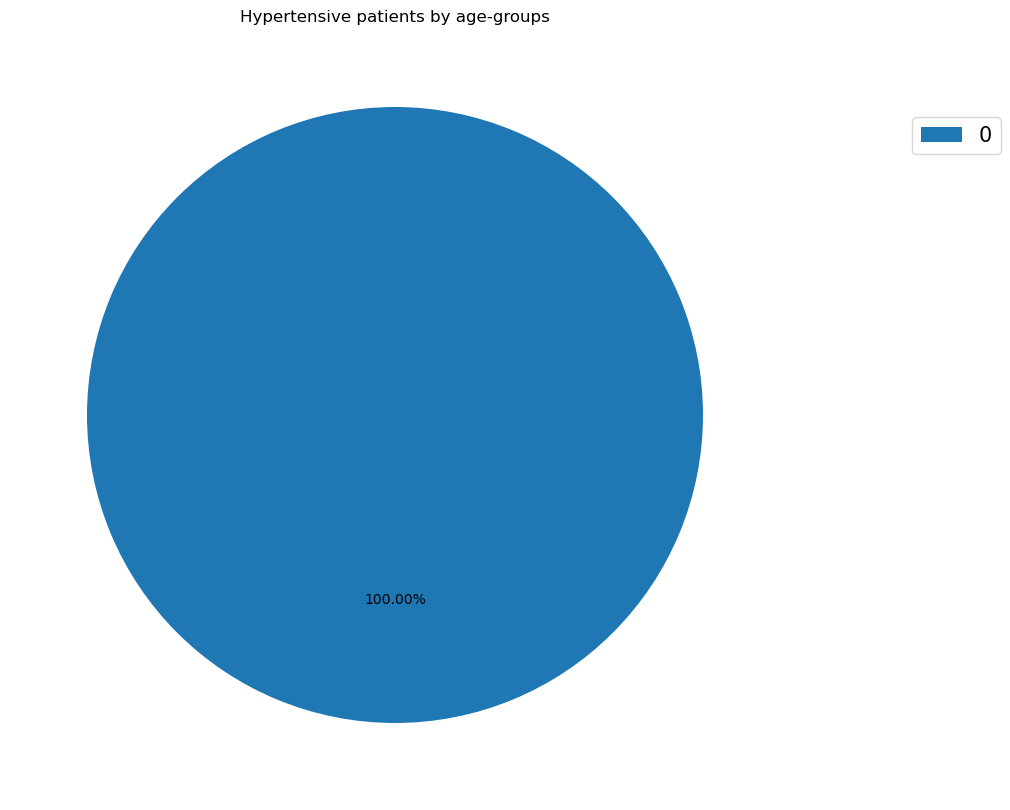

In [43]:


labels = targetageFormatData.columns.tolist()
transposed = targetageFormatData.T
values = transposed.values.tolist()[0]  # Extract the first row of values
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
ax.pie(values, startangle=90, autopct='%.2f%%')
ax.set_title('Hypertensive patients by age-groups')
ax.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 0.9), fontsize=15)  # Set the legend
plt.show()


In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(4999, 13) (3999, 13) (1000, 13)


In [46]:
classifier = svm.SVC(kernel='linear')

In [47]:
X_train = np.nan_to_num(X_train)
Y_train = np.nan_to_num(Y_train)
X_test = np.nan_to_num(X_test)
Y_test = np.nan_to_num(Y_test)

In [48]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [49]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [50]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8594648662165542


In [51]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [52]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.845


In [53]:
input_data = (46,	1,	0,	150,	407,	0,	0,	154,	0,	4,	1,	3,	3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not hypertensive')
else:
  print('The person is hypertensive')

[0]
The person is not hypertensive


In [54]:
import pickle

In [55]:
filename = 'hypertension_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [56]:
loaded_model = pickle.load(open('hypertension_model.sav', 'rb'))

In [57]:
input_data = (46,	1,	0,	150,	407,	0,	0,	154,	0,	4,	1,	3,	3)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not hypertensive')
else:
  print('The person is hypertentive')

[0]
The person is not hypertensive


In [58]:
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
